In [ ]:
# # Data Visualization & Analysis for Regression (AIM-VEE / CM + EV)
# This notebook:
# - Loads CM features + target (EV / excitation energy)
# - Checks basic stats and ranges
# - Visualizes distributions
# - Computes correlations with the target
# - Runs PCA for structure


In [ ]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, r2_score
from sklearn.ensemble import RandomForestRegressor

# Make plots look bit nicer
plt.style.use("default")
sns.set_theme(context="notebook", style="whitegrid")



#Load Data



DATA_DIR = "/Users/lohitakshbadarala/Desktop/AIM-VEE/data/vee_predictor/Data"

X_path = os.path.join(DATA_DIR, "CM_train.npy")  # features
y_path = os.path.join(DATA_DIR, "EV_train.npy")  # target

X = np.load(X_path)   # shape: (N, d_rep)
y = np.load(y_path)   # shape: (N,)

print("X shape:", X.shape)
print("y shape:", y.shape)


y = y.reshape(-1)
print("y shape after reshape:", y.shape)


n_features_for_df = min(100, X.shape[1])  
df = pd.DataFrame(X[:, :n_features_for_df],
                  columns=[f"f_{i}" for i in range(n_features_for_df)])
df["target"] = y

df.head()



X shape: (6000000, 255)
y shape: (6000000,)
y shape after reshape: (6000000,)


KeyboardInterrupt: 


=== Basic Feature Stats (first 100 features) ===


,count,mean,std,min,25%,50%,75%,max
f_0,6000000.0,52.355343,13.425568,36.858105,36.858105,53.358707,53.358707,73.516695
f_1,6000000.0,30.684507,7.600779,12.573167,27.696932,29.767512,32.253421,53.233356
f_2,6000000.0,52.754075,16.001159,36.858105,36.858105,53.358707,73.516695,73.516695
f_3,6000000.0,23.165097,8.508983,13.297835,16.560161,22.077680,24.801042,51.227748
f_4,6000000.0,27.600724,7.900471,14.246549,20.130601,28.205923,32.561764,44.993275
...,...,...,...,...,...,...,...,...
f_96,6000000.0,1.762336,1.575528,0.000000,0.000000,1.708355,2.775472,5.364403
f_97,6000000.0,1.662264,1.706033,0.000000,0.000000,1.253297,2.737360,7.491560
f_98,6000000.0,1.783828,1.706499,0.000000,0.000000,1.361674,2.797815,8.520787
f_99,6000000.0,1.943989,2.093055,0.000000,0.000000,1.180234,3.116875,7.403812



=== Target Stats ===
min: -24900.4
max: 129174.4
mean: 54867.6370140667
std: 15365.505961002138


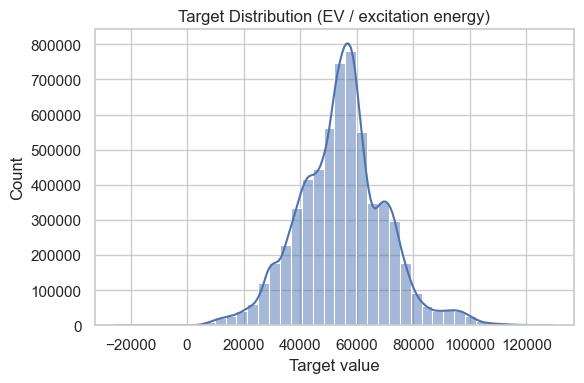

In [ ]:

#1 Basic stats

print("\n=== Basic Feature Stats (first", n_features_for_df, "features) ===")
display(df.describe().T)

print("\n=== Target Stats ===")
print("min:", float(y.min()))
print("max:", float(y.max()))
print("mean:", float(y.mean()))
print("std:", float(y.std()))


# Target distribution
plt.figure(figsize=(6,4))
sns.histplot(y, bins=40, kde=True)
plt.title("Target Distribution (EV / excitation energy)")
plt.xlabel("Target value")
plt.ylabel("Count")
plt.tight_layout()
plt.show()

#NOTE: The min value -24900.45 seems like an outlier and is not possible. Consider investigating further or removing it if necessary.



Top 20 features most positively correlated with target:


target    1.000000
f_8       0.188125
f_2       0.169727
f_0       0.148512
f_67      0.148003
f_9       0.130995
f_16      0.060251
f_7       0.032895
f_15      0.023272
f_1       0.002222
f_5      -0.005739
f_66     -0.081495
f_6      -0.098268
f_4      -0.103075
f_64     -0.105500
f_63     -0.130958
f_3      -0.131620
f_17     -0.140607
f_18     -0.166444
f_71     -0.173069
Name: target, dtype: float64


Top 20 features most negatively correlated with target:


f_89   -0.353696
f_56   -0.356505
f_26   -0.357729
f_13   -0.362967
f_77   -0.365356
f_14   -0.365356
f_40   -0.370424
f_39   -0.383953
f_45   -0.385204
f_86   -0.391434
f_19   -0.393599
f_84   -0.398671
f_50   -0.409463
f_93   -0.426613
f_60   -0.429422
f_92   -0.433745
f_91   -0.445293
f_96   -0.458219
f_95   -0.478771
f_94   -0.481476
Name: target, dtype: float64

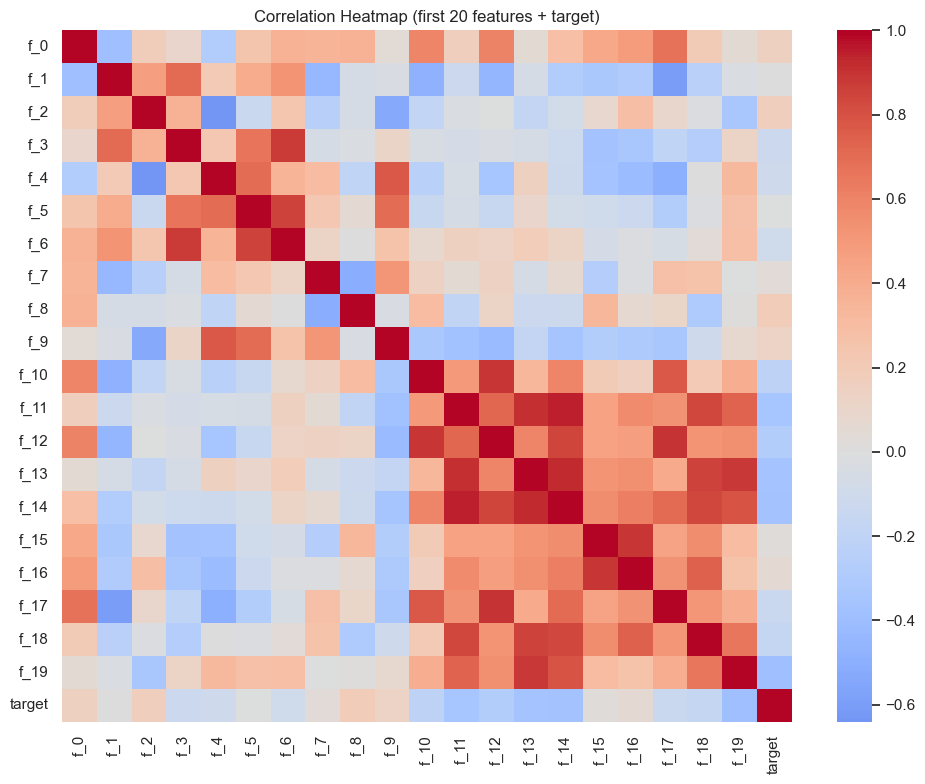

In [ ]:

#2 Correlation with target
# Pearson correlations between each feature and the target

corr_with_target = df.corr()["target"].sort_values(ascending=False)
print("\nTop 20 features most positively correlated with target:")
display(corr_with_target.head(20))

print("\nTop 20 features most negatively correlated with target:")
display(corr_with_target.tail(20))

# Correlation heatmap for a small subset of features
subset_feats = [f"f_{i}" for i in range(min(20, n_features_for_df))] + ["target"]
corr_matrix = df[subset_feats].corr()

plt.figure(figsize=(10,8))
sns.heatmap(corr_matrix, annot=False, cmap="coolwarm", center=0)
plt.title("Correlation Heatmap (first 20 features + target)")
plt.tight_layout()
plt.show()


/opt/anaconda3/envs/aim_vee/lib/python3.10/site-packages/sklearn/decomposition/_pca.py:604: RuntimeWarning: divide by zero encountered in matmul
  C = X.T @ X
/opt/anaconda3/envs/aim_vee/lib/python3.10/site-packages/sklearn/decomposition/_pca.py:604: RuntimeWarning: overflow encountered in matmul
  C = X.T @ X
/opt/anaconda3/envs/aim_vee/lib/python3.10/site-packages/sklearn/decomposition/_pca.py:604: RuntimeWarning: invalid value encountered in matmul
  C = X.T @ X
/opt/anaconda3/envs/aim_vee/lib/python3.10/site-packages/sklearn/decomposition/_base.py:148: RuntimeWarning: divide by zero encountered in matmul
  X_transformed = X @ self.components_.T
/opt/anaconda3/envs/aim_vee/lib/python3.10/site-packages/sklearn/decomposition/_base.py:148: RuntimeWarning: overflow encountered in matmul
  X_transformed = X @ self.components_.T
/opt/anaconda3/envs/aim_vee/lib/python3.10/site-packages/sklearn/decomposition/_base.py:148: RuntimeWarning: invalid value encountered in matmul
  X_transformed =

Explained variance ratio (first 10 components):
[0.52886677 0.18889148 0.11294281 0.04703827 0.03657368 0.03349573
 0.0268412  0.00609092 0.00498182 0.00392157]
Cumulative explained variance (first 10):
[0.52886677 0.71775825 0.83070106 0.87773934 0.91431302 0.94780875
 0.97464994 0.98074086 0.98572268 0.98964425]


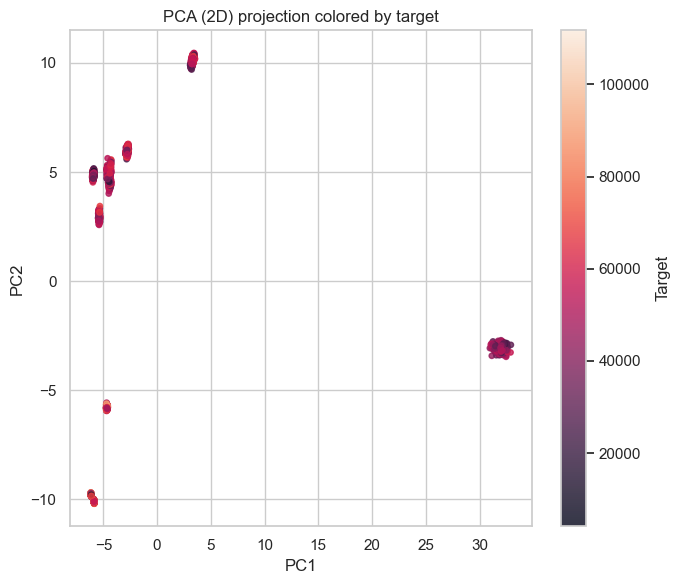

In [ ]:
#3 PCA Analysis

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# PCA to see intrinsic dimensionality/structure
pca = PCA(n_components=20)
X_pca = pca.fit_transform(X_scaled)

print("Explained variance ratio (first 10 components):")
print(pca.explained_variance_ratio_[:10])
print("Cumulative explained variance (first 10):")
print(np.cumsum(pca.explained_variance_ratio_[:10]))

# 2D PCA scatter colored by target)
max_points = 3000
idx = np.random.choice(len(X_pca), size=min(max_points, len(X_pca)), replace=False)

plt.figure(figsize=(7,6))
sc = plt.scatter(X_pca[idx, 0], X_pca[idx, 1], c=y[idx], s=15, alpha=0.8)
plt.colorbar(sc, label="Target")
plt.title("PCA (2D) projection colored by target")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.tight_layout()
plt.show()
